## introduction to scikit-learn

# an end to end scikit-leran workflow

In [7]:
#get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
#split the data into x and y
x=heart_disease.drop("target" , axis=1)

y=heart_disease["target"]#we are using yx to predict y

In [9]:
#choose a model for the data
from sklearn.ensemble import RandomForestClassifier#for classification problems
clf= RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
#fit the model to the training data
from sklearn.model_selection import train_test_split
#split data into training and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [11]:
clf.fit(x_train, y_train);

In [12]:
#make prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
#evaluate the model
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.8524590163934426

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [16]:
#improve a model
#using different n_estimators
# np.random.seed(42)
for i in range (10,100,20): 
    print(f"trying a model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)}")

trying a model with 10 estimators...
Model accuracy on test set:0.7540983606557377
trying a model with 30 estimators...
Model accuracy on test set:0.8032786885245902
trying a model with 50 estimators...
Model accuracy on test set:0.8688524590163934
trying a model with 70 estimators...
Model accuracy on test set:0.8032786885245902
trying a model with 90 estimators...
Model accuracy on test set:0.8524590163934426


In [17]:
# Save the model to a file using pickle
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

print("Model saved to random_forest_model.pkl")

Model saved to random_forest_model.pkl


In [18]:
# Load the model from the file
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [19]:
# Test the loaded model on the test data
accuracy = loaded_model.score(x_test, y_test)
print(f"Loaded model accuracy on test set: {accuracy}")


Loaded model accuracy on test set: 0.8524590163934426


In [20]:
x_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2


In [21]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2


## Getting data ready for machine learning

In [22]:
#1.check your data
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
#2.Split the data to x and y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
#3.Spliting the training data to training and test sets
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y, test_size=0.2)

## covert data to numbers

In [27]:
car_sales=pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [28]:
#split the data to x and y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [29]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
#choose and fit a model
from sklearn.ensemble import RandomForestRegressor

In [31]:
x

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [32]:
y

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
5     $4,500.00
6     $7,500.00
7     $7,000.00
8     $6,250.00
9     $9,700.00
Name: Price, dtype: object

In [33]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [34]:
#transform categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [35]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [36]:
transformed_x.shape

(10, 13)

In [37]:
y

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
5     $4,500.00
6     $7,500.00
7     $7,000.00
8     $6,250.00
9     $9,700.00
Name: Price, dtype: object

In [38]:
y_cleaned = pd.Series(y).replace({'\$': '', ',': ''}, regex=True).astype(float)
y_cleaned

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

In [39]:
y_cleaned.shape

(10,)

In [40]:
#refit the model
# np.random.seed(42)
# x_train, y_train,x_test,y_test=train_test_split(transformed_x,y_cleaned,
#                                                 test_size=0.2)
# model=RandomForestRegressor()
# model.fit(x_train,y_train)

In [41]:
y_cleaned.shape,transformed_x.shape

((10,), (10, 13))

In [42]:
# Split the data into training and test sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y_cleaned, test_size=0.2)

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# # Evaluate the model
# score = model.score(x_test, y_test)
# print(f"Model R^2 score: {score}")

RandomForestRegressor()

In [43]:
model.score(x_test,y_test)

-1.2793638399999998

In [44]:
car_sales_missing_data=pd.read_csv("car-sales-missing-data.csv")
car_sales_missing_data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [45]:
#filling mising data
car_sales_missing_data["Make"].fillna("Benzo",inplace=True)
car_sales_missing_data.loc[car_sales_missing_data["Odometer"].isna(), "Odometer"] = ["3455", "4654", "7684", "2451"]
car_sales_missing_data["Doors"].fillna(4,inplace=True)
car_sales_missing_data.loc[car_sales_missing_data["Price"].isna(), "Price"]= ["6780","9000"]
car_sales_missing_data["Colour"].fillna("Orange",inplace=True)
car_sales_missing_data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,3455,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,4654,4.0,"$4,500"
6,Honda,Orange,7684,4.0,"$7,500"
7,Honda,Blue,2451,4.0,6780
8,Toyota,White,60000.0,4.0,9000
9,Benzo,White,31600.0,4.0,"$9,700"


In [46]:
car_sales_missing_data.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [47]:
x=car_sales_missing_data.drop("Price",axis=1)
y=car_sales_missing_data["Price"]

In [48]:
#transform categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<10x15 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [49]:
pd.DataFrame(transformed_x)

,0
0,"(0, 4)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
1,"(0, 2)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
2,"(0, 4)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
3,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 13)\t1.0\n..."
4,"(0, 3)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
5,"(0, 4)\t1.0\n (0, 7)\t1.0\n (0, 12)\t1.0\n..."
6,"(0, 2)\t1.0\n (0, 8)\t1.0\n (0, 12)\t1.0\n..."
7,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
8,"(0, 4)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
9,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."


In [50]:
y

0     $4,000
1     $5,000
2     $7,000
3    $22,000
4     $3,500
5     $4,500
6     $7,500
7       6780
8       9000
9     $9,700
Name: Price, dtype: object

In [51]:
y_cleaned = pd.Series(y).replace({'\$': '', ',': ''}, regex=True).astype(float)
y_cleaned

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     6780.0
8     9000.0
9     9700.0
Name: Price, dtype: float64

In [52]:
transformed_x.dtype

dtype('float64')

In [53]:
y_cleaned.shape,transformed_x.shape

((10,), (10, 15))

In [54]:
np.random.seed(42) 
x_train, x_test, y_train, y_test=train_test_split(transformed_x, y_cleaned,
                                               test_size=0.2)
model = RandomForestRegressor() 
model.fit(x_train,y_train)
model.score(x_test,y_test)
# Split the data into training and test sets
# np.random.seed(42)
# x_train, x_test, y_train, y_test = train_test_split(transformed_x, y_cleaned, test_size=0.2)

# # Train a RandomForestRegressor model
# model = RandomForestRegressor()
# model.fit(x_train, y_train)


-0.3365490499999999

In [55]:
model.score(x_test, y_test)

-0.3365490499999999

## Fill missisng values with scikit-learn

In [56]:
car_sales_missing =pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [57]:
#drop rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
9,NaN,White,31600.0,4.0,"$9,700"


In [58]:
#split x and y
x= car_sales_missing.drop("Price",axis=1)
y= car_sales_missing["Price"]

In [59]:
#replace missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
 #Fill the categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value='missing')
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define the columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer"]
#Create an imputer (simething that fills the missing data)
imputer=ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                          ("door_imputer", door_imputer, door_features),
                          ("num_imputer", num_imputer, num_features)])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Toyota', 'White', 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 87899.0],
       ['Toyota', 'Blue', 3.0, 98763.2],
       ['BMW', 'Black', 5.0, 11179.0],
       ['Nissan', 'White', 4.0, 213095.0],
       ['Toyota', 'Green', 4.0, 98763.2],
       ['Honda', 'missing', 4.0, 98763.2],
       ['missing', 'White', 4.0, 31600.0]], dtype=object)

In [60]:
car_missing_filled = pd.DataFrame(filled_x,
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_missing_filled

,Make,Colour,Doors,Odometer (KM)
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,98763.2
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0
5,Toyota,Green,4.0,98763.2
6,Honda,missing,4.0,98763.2
7,missing,White,4.0,31600.0


In [61]:
#converting our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_missing_filled)
transformed_x

<8x15 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [62]:
y_clean = car_sales_missing["Price"].replace({'\$': '', ',': ''}, regex=True).astype(float)

y_reset = y_clean.reset_index(drop=True)
y_reset

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     9700.0
Name: Price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#split the data to training and test sets
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y_reset, test_size=0.2)
#fit the training model and predict
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.0

## Using Real World Data

In [64]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [65]:
housing_df = pd.DataFrame(housing_data["data"],columns=housing_data["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
housing_df["target"]=housing_data["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [67]:
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
#using Ridge regression
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.5758549611440125

In [69]:
#using SVR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

scaler=StandardScaler()
model =SVR()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.013403957405333955

In [70]:
#using Lasso
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

scaler=StandardScaler()
model = Lasso()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2841671821008396

In [71]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing_df.plot()
# plt.show

In [72]:
#using ensemble
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

model = RandomForestRegressor()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8051230593157366

In [73]:
#using classification data
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [74]:
#trying LinearSVC after consulting the map
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2 , random_state=42)

clf = LinearSVC()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [75]:
#using ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2 , random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8360655737704918

## Making prediction using machine learning moderl

In [76]:
#using predict function
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [78]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8360655737704918

In [80]:
clf.predict_proba(x_test[:5])#gives probability values

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [81]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [82]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

from sklearn.model_selection import train_test_split

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model=RandomForestRegressor()
model.fit(x_train,y_train)

from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mean_absolute_error(y_test,y_preds)

0.32754256845930246

## Evaluating ML models

In [83]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
clf.score(x_train,y_train)

1.0

In [85]:
clf.score(x_test,y_test)

0.8360655737704918

In [86]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

from sklearn.model_selection import train_test_split

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model=RandomForestRegressor()
model.fit(x_train,y_train)

# from sklearn.metrics import mean_absolute_error
# y_preds = model.predict(x_test)
# mean_absolute_error(y_test,y_preds)

RandomForestRegressor()

In [87]:
model.score(x_test,y_test)

0.8051230593157366

## Evaluating ML models using score parameter


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

cross_val_score(clf,x,y,cv=5)

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [89]:
#comparing the two
np.random.seed(42)
clf_single_score = clf.score(x_test,y_test)

cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

clf_single_score,cross_val_score


(0.8360655737704918, 0.8248087431693989)

## Classification model evaluation metrics

In [90]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [91]:
#1.Accuracy
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

cross_val_score = cross_val_score(clf,x,y,cv=5)
np.mean(cross_val_score)

print(f"The cross_validated accuracy is:{np.mean(cross_val_score)*100:.2f}%")

The cross_validated accuracy is:82.15%


In [92]:
#2.Area under ROC curve
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.metrics import roc_curve

clf.fit(x_train,y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47]])

In [93]:
y_probs_possitive = y_probs[:,1]
y_probs_possitive[:10]

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47])

In [94]:
#calculate fpr,tpr,thresholds
fpr,tpr, thresholds = roc_curve(y_test,y_probs_possitive)

In [95]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.24137931, 0.24137931, 0.31034483, 0.4137931 , 0.44827586,
       0.51724138, 0.55172414, 0.65517241, 0.68965517, 0.72413793,
       0.86206897, 1.        ])

In [96]:
tpr

array([0.     , 0.0625 , 0.28125, 0.40625, 0.4375 , 0.59375, 0.65625,
       0.6875 , 0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625,
       0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ])

In [97]:
thresholds

array([ inf, 0.99, 0.85, 0.81, 0.79, 0.7 , 0.66, 0.65, 0.64, 0.62, 0.59,
       0.55, 0.46, 0.41, 0.36, 0.35, 0.33, 0.24, 0.19, 0.16, 0.14, 0.13,
       0.1 , 0.09, 0.08, 0.05, 0.  ])

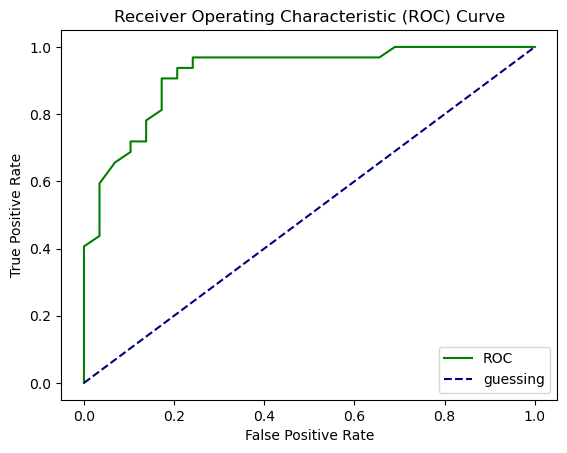

In [98]:
#Ploting ROC
import matplotlib.pyplot as plt
def ROC_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="green",label="ROC")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--',label="guessing")  # Diagonal line
    #labeling
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_curve(fpr,tpr)

In [99]:
from sklearn.metrics import roc_auc_score
y_score = roc_auc_score(y_test,y_probs_possitive)
y_score

0.9202586206896551

In [100]:
#practise on prediction
#1.classification
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)
accuracy_score(y_preds,y_test)

print(f"The accuracy score is : {accuracy_score(y_preds,y_test)*100:.2f}%")


The accuracy score is : 83.61%


In [101]:
#2.regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
np.random.seed(42)

from sklearn.model_selection import train_test_split

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model=RandomForestRegressor()
model.fit(x_train,y_train)

y_preds= model.predict(x_test)
mean_absolute_error(y_preds,y_test)

print(f"The accuracy score is : {mean_absolute_error(y_preds,y_test)*100:.2f}%")

The accuracy score is : 32.75%


In [102]:
#practise on evaluating ml models (classification)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

score = cross_val_score(clf,x,y, cv=100)
np.mean(score)

print(f"The cross validated score is : {np.mean(score)*100:.2f}%")




The cross validated score is : 82.42%


#AUC OR ROC


## Confusion matrix

In [103]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [104]:
#it quickly compares the labels a model predicts and the actual labels it was supposed to predict

from sklearn.metrics import confusion_matrix
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [105]:
#visualize the confusion matrix using pd.crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,5,27


In [106]:
#installing seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.1




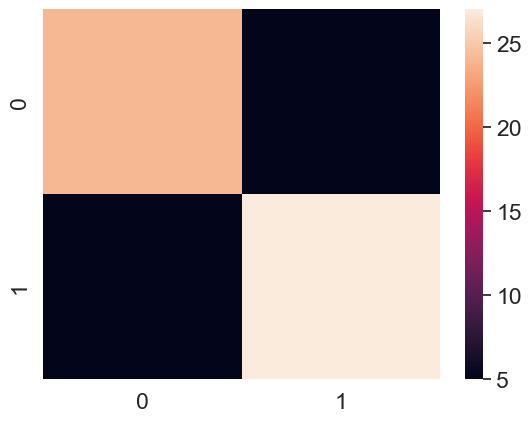

In [107]:
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix

conf_mat=confusion_matrix(y_test,y_preds)

#plot using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-learn

In [108]:
import sklearn
sklearn.__version__

'1.3.0'

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(estimator=clf, x=x ,y=y)

TypeError: ConfusionMatrixDisplay.from_estimator() got an unexpected keyword argument 'x'

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds,
                                       cmap='cividis')

## Classification report

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Regression model evaluation metrics

In [111]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [112]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x= housing_df.drop("target", axis=1)
y= housing_df["target"]

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)


0.8051230593157366

In [113]:
y_test_mean = np.full(len(y_test), y_test.mean())

In [114]:
#r2_score
from sklearn.metrics import r2_score
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [115]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds= model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32754256845930246

In [116]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)

## Finally using the scoring parameter

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

cross_val_score(clf,x ,y, cv=5)



array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [118]:
#1.Using accuracy
cv_acc = cross_val_score(clf,x , y, cv=5, scoring="accuracy" )
print(f"The Cross Validated score is :{np.mean(cv_acc)*100:.2f}%")

The Cross Validated score is :82.81%


In [119]:
#2.Using precision
cv_precision = cross_val_score(clf,x , y, cv=5, scoring="precision" )
print(f"The Cross Validated score is :{np.mean(cv_precision)}")

The Cross Validated score is :0.8380795442115726


In [120]:
#3.Using Recall
cv_recall = cross_val_score(clf,x , y, cv=5, scoring="recall" )

In [121]:
#cross Validated recall
print(f"The Cross Validated score is :{np.mean(cv_recall)}")

The Cross Validated score is :0.8545454545454545


## scoring parameter on Regression model

In [122]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

cv_r2 = cross_val_score(model,x ,y, cv=3)
np.mean(cv_r2)

0.6540661895188392

In [ ]:
#mean squared error
cv_mse = cross_val_score(model,x,y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

In [ ]:
#mean absolute error
cv_mae = cross_val_score(model,x,y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

### Using different evaluation metrics as Scikit-Learn functions
the 3rd way to evaluate scikit-learn models

In [ ]:
#classification
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_preds = clf.predict(x_test)


In [ ]:
#1.accuracy score
accuracy_score(y_test,y_preds)

In [ ]:
#2.precision score
precision_score(y_test,y_preds)

In [ ]:
#3.recall score
recall_score(y_test,y_preds)

In [ ]:
#4.fi score
f1_score(y_test,y_preds)

In [ ]:
#regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

y_preds = model.predict(x_test)


In [ ]:
r2_score(y_test,y_preds)

In [ ]:
mean_absolute_error(y_test,y_preds)

In [ ]:
mean_squared_error(y_test,y_preds)

### Improving a model
first predictions = baseline prediction
first model = baseline model


In [ ]:
clf.get_params()

## Adjusting hyperparameters

### 1. tuning by hand

In [ ]:
heart_disease

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy":round(accuracy, 2),
               "precision":round(precision, 2),
               "recall":round(recall, 2),
               "fi":round(f1, 2)}
    print(f"acc :{accuracy * 100:.2f}%")
    print(f"pre :{precision:.2f}")
    print(f"rec: {recall:.2f}")
    print(f"f1 : {f1:.2f}")
    
    return metric_dict
    

In [146]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import train_test_split
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# First split: 70% training, 30% temp (which will be split further)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Second split: 50% of the temp data (15% of the original) for validation, and 50% for test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# # Print sizes of each set
# print(f"Training set size: {len(x_train)} samples")
# print(f"Validation set size: {len(x_val)} samples")
# print(f"Test set size: {len(x_test)} samples")

y_preds = clf.predict(x_test)

baseline_metrics = evaluate_preds(y_test,y_preds)
baseline_metrics

acc :84.78%
pre :0.88
rec: 0.84
f1 : 0.86


{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.84, 'fi': 0.86}

### Tuning with RandomizedSearchCv

In [147]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

grid =  {
    'n_estimators': [100, 200, 500],           # Number of trees in the forest
    'max_depth': [10, 50, 100, None],          # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]                 # Whether to use bootstrap samples or not
}

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20,random_state=20)

clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklea

In [148]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [149]:
rs_y_preds = rs_clf.predict(x_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

acc :80.00%
pre :0.77
rec: 0.91
f1 : 0.83


### Tuning with GridSearchCv

In [145]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid_2 = grid =  {
    'n_estimators': [100, 500],           # Number of trees in the forest
    'max_depth': [10, 50,  None],          # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,  5],             # Minimum number of samples required at each leaf node
    'max_features': ['auto',  'log2'],  # Number of features to consider at each split             
}

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20,random_state=20)


clf = RandomForestClassifier()

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

gs_clf.fit(x_train,y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_feature

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=None,

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, None],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 500]},
             verbose=2)

In [150]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [151]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)

acc :85.00%
pre :0.83
rec: 0.91
f1 : 0.87


## Compairing the three

<Axes: >

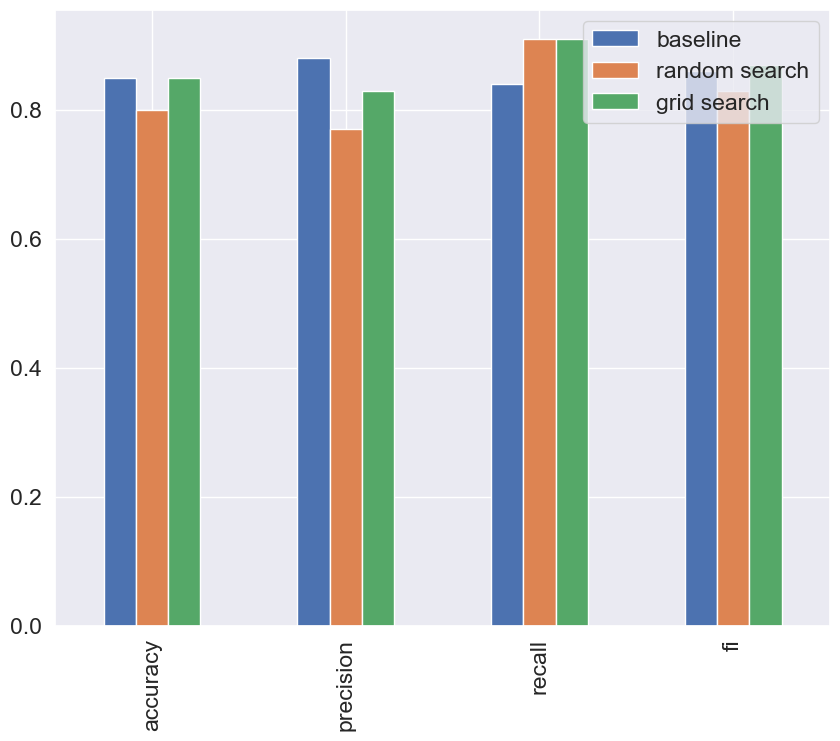

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
comparison_data = pd.DataFrame({"baseline":baseline_metrics,
                               "random search":rs_metrics,
                               "grid search":gs_metrics})

comparison_data.plot.bar(figsize=(10,8))

## Save and load a trained model

## 1.using python's pickle model

In [156]:
import pickle

#saving existing module

# Saving the GridSearchCV object to a file
with open('gs_clf_model.pkl', 'wb') as model_file:
    pickle.dump(gs_clf, model_file)


In [157]:
#load a saved model
with open('gs_clf_model.pkl', 'rb') as model_file:
    loaded_gs_clf = pickle.load(model_file)


In [158]:
#make predictions
pickle_y_preds = loaded_gs_clf.predict(x_test)

evaluate_preds(y_test,pickle_y_preds)

acc :85.00%
pre :0.83
rec: 0.91
f1 : 0.87


{'accuracy': 0.85, 'precision': 0.83, 'recall': 0.91, 'fi': 0.87}

## 2. using joblib module

In [159]:
from joblib import dump,load
dump(gs_clf,filename="gs_clf_random_forest_model.joblib")

['gs_clf_random_forest_model.joblib']

In [162]:
loaded_joblib_model = load(filename="gs_clf_random_forest_model.joblib")

In [163]:
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

acc :85.00%
pre :0.83
rec: 0.91
f1 : 0.87


{'accuracy': 0.85, 'precision': 0.83, 'recall': 0.91, 'fi': 0.87}

## Putting it all together

In [169]:
data = pd.read_csv("car-sales-extended-missing-data (1).csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [170]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [172]:
#drop rows with missing data
data.dropna(subset=["Price"], inplace=True)

#split data to x and y
x = data.drop("Price", axis=1)
y = data["Price"]

In [171]:
#1.getting data ready
#we are using simpleimputer to fill missing data,onehotencoder to transform data to numerical values, pipeline provides a smooth transition for this two
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#2.modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#.3setup random seed
np.random.seed(42)


In [173]:
#define categorical features
categorical_features = ["Make","Colour"]
#create categorical transformer(imputes missing values the one encodes them)
categorical_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='constant', fill_value="missing")),
    ("onehot" , OneHotEncoder(handle_unknown='ignore'))
])

#define door feature
door_feature = ["Doors"]
#create door transformer(fills the missing values)
door_transfomer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='constant', fill_value=4))
])

#define numerical feature
numerical_feature = ["Odometer (KM)"]
#create a numerical transformer(fills missing data)
numerical_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='mean'))
])

In [189]:
#create a colunm transfomer which combines all other transformers in one step
preprocessor = ColumnTransformer(
        transformers=[
    #name, transformer_to_use, features_to_use transform
    ('cat', categorical_transformer, categorical_features),
    ('door', door_transfomer, door_feature),
    ('num', numerical_transformer, numerical_feature)])

    #create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),#this will fill our missing data and make sure its all numbers
                       ('model',RandomForestRegressor())])#this will model our data

#split the data to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.22282251855854185

In [192]:
#tuning using gridsearchcv
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],  # Corrected key
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],  # You might need to ensure that 'auto' is valid for the model
    "model__min_samples_split": [2, 4]    
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2,error_score='raise')

gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [193]:
gs_model.score(x_test, y_test)

0.28472951338320185